# Figure 3: Hysteresis

### 1. Micromagnetic simulations

Here we recreate a plot from Figure 3 in 

    Beg, M. et al. Stable and manipulable Bloch point. arXiv 1808.10772 (2018).

This notebook uses results from `*.txt` files which are already part of this repository. The script used to generate those files is `src/hysteresis.py`. If you want to rerun micromagnetic simulations, use:

    make hysteresis
    
Micromagnetic simulations will be run inside [Docker](https://www.docker.com/) container, which contains all the necessary software. Therefore, please make sure you have Docker installed on your machine. Installation instructions can be found [here](https://docs.docker.com/install/).

Details about Docker images, VTK, and H5 files can be found in `README.md` file, which is a part of the Github [`marijanbeg/2019-paper-bloch-point-stability`](https://github.com/marijanbeg/2019-paper-bloch-point-stability) repository or in `index.ipynb`.

### 2. Plot
    
We start by reading the results:

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%matplotlib inline

# geometry parameters
d = 150  # disk diameter (nm)
hb = 20  # bottom layer thickness (nm)
ht = 10  # top layer thickness (nm)

# Create an array of external fields for which the system was relaxed.
Bmax = 1  # maximum field in hysteresis (T)
dB = 0.1  # field step (T)
B_array = np.concatenate([np.arange(Bmax, -Bmax, -dB),
                          np.arange(-Bmax, Bmax+1e-12, dB)])

mz_total = []
for state in np.arange(0, 41, 1):
    basename = 'd{}hb{}ht{}'.format(d, hb, ht)
    rdir = '../results/hysteresis/{}'.format(basename)
    txt_filename = '{}/state_{}.txt'.format(rdir, state)
    with open(txt_filename, "r") as f:
        data = eval(f.read())

    mz_total.append(data['average_total'][2])

Now, we can draw the plot:

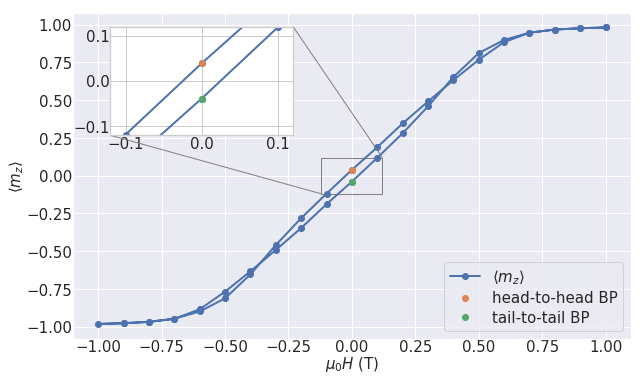

In [2]:
# NBVAL_IGNORE_OUTPUT
sns.set()
plt.style.use('./customstyle.mplstyle')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(B_array, mz_total, 'o-', label=r"$\langle m_{z} \rangle$")
ax.plot(0, mz_total[10], 'o', label='head-to-head BP')
ax.plot(0, mz_total[30], 'o', label='tail-to-tail BP')
plt.xlabel(r"$\mu_{0}H$ (T)")
plt.ylabel(r"$\langle m_{z} \rangle$")
plt.legend(loc=4)

# Plot zoomed part around zero.
sns.set_style("whitegrid")
plt.style.use('./customstyle.mplstyle')
axins = zoomed_inset_axes(ax, 3, loc=3, bbox_to_anchor=(120, 250))
axins.plot(B_array, mz_total, 'o-')
axins.plot(0, mz_total[10], 'o')
axins.plot(0, mz_total[30], 'o')
axins.set_xlim(-0.12, 0.12)
axins.set_ylim(-0.12, 0.12)
axins.xaxis.get_major_locator().set_params(nbins=3)
axins.yaxis.get_major_locator().set_params(nbins=3)
plt.xticks([-0.1, 0, 0.1])
plt.yticks([-0.1, 0, 0.1])
mark_inset(ax, axins, loc1=1, loc2=3, ec="0.5");